# 3. 데이터 분석

## 3.1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

In [2]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

## 3.2 데이터 확인

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()   

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# 결측치 확인
entry_data.isnull().sum()                    # 요금제명 263개, 이용 22개 결측지 존재

요금제명    263
입실        0
퇴실        0
이용       22
위치        0
금액        0
구분        0
고객        0
dtype: int64

In [5]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [6]:
# 결측치 확인
sales_data.isnull().sum()                    # 고객 아이디 결측치이므로 본 프로젝트에는 관련이 없는 데이터이다. 따라서 괜찮음

결제일시      0
판매위치      0
상품명       0
결제방식      0
비고        0
판매수량      0
결제금액      0
고객      805
dtype: int64

In [7]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [8]:
# 결측치 확인
item_data.isnull().sum()                 # 결측치 없음

구분      0
분류      0
상품명     0
판매금액    0
dtype: int64

In [9]:
# item_entry_data 데이터 정보 확인하기
# 입장권  
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [10]:
# 결측치 확인
item_entry_data.isnull().sum()            # 결측치 없음

순위      0
분류      0
상품명     0
판매금액    0
dtype: int64

## 3.3 데이터 분석하기

### 필수 문제1 : 월별 매출액 추세(sales_data를 이용)

월별 매출액 추세를 집계하고 그 결과를 시각화
- 힌트 : groupby()

In [11]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [12]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].apply(lambda x: x[:7])

## 노드 예시
# temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [13]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['payment'] = sales_data['결제금액'].str.replace(',', '')
print(temp_var.dtypes)
temp_var

결제일시       object
판매위치       object
상품명        object
결제방식       object
비고         object
판매수량        int64
결제금액       object
고객         object
date       object
payment    object
dtype: object


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04,5000
...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02,-3500
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02,4500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02,-4500
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02,4000


In [14]:
# salse_data의 결제금액을 숫자형태로 바꾸기
temp_var['payment'] = temp_var['payment'].astype('int')
temp_var.dtypes

결제일시       object
판매위치       object
상품명        object
결제방식       object
비고         object
판매수량        int64
결제금액       object
고객         object
date       object
payment     int64
dtype: object

In [15]:
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data = payment_data.reset_index().sort_values(by='date')
payment_data

,date,payment
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


Text(0.5, 1.0, 'Sales by Month')

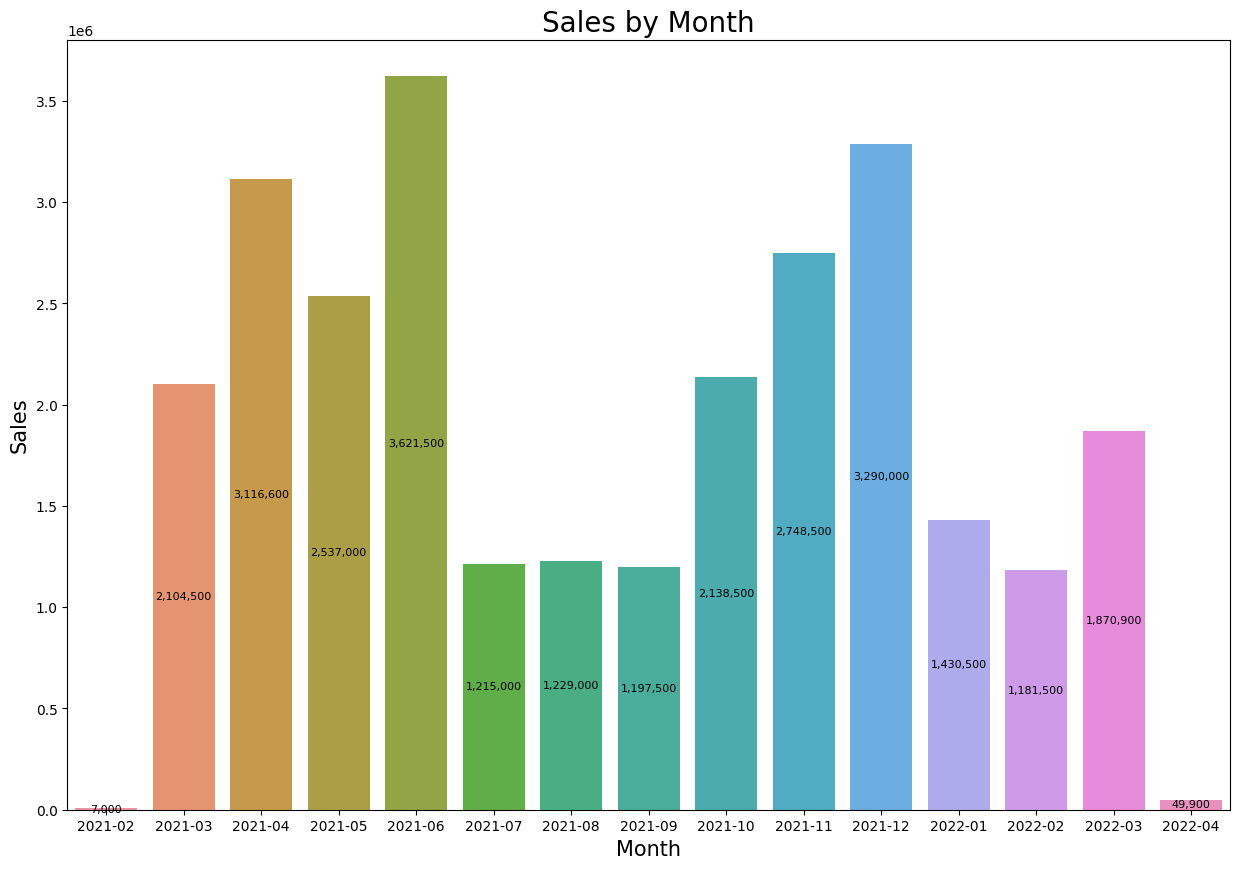

In [16]:
# 집계 결과를 시각화하기

plt.figure(figsize=(15, 10))

ax = sns.barplot(data=payment_data, x=payment_data['date'], y=payment_data['payment'], )
# ax = payment_data.plot(kind='bar')

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues], label_type='center',  fontsize='8')
# ax.bar_label(container, fmt='%.0f건', label_type='center', fontsize='8')
plt.xlabel('Month', fontsize='15')
plt.ylabel('Sales', fontsize='15')
plt.title('Sales by Month',  fontsize='20')

### 필수문제 2 : 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

- 힌트: value_counts() 함수를 사용하세요.

In [17]:
# '결제취소'가 존재하기 때문에 value_count로 집계하면 각 상품에 대한 불필요한 행 두 개(구매 +1, 판매취소/결제취소 -1)가 카운트된다. 
# 따라서 value_count로 하면 카우트되지 말았어야할 2개의 행이 카운트되어 정확한 판매개수를 얻을 수 없다
# 참고로 value_count는 unique한 행의 개수를 세는 함수이다

temp_var[temp_var['판매수량'] == -1]

# 판매취소(-1)는 160건

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
22,2022-03-31 11:31,카운터,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN,2022-03,-4400
28,2022-03-31 11:13,카운터,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN,2022-03,-4400
89,2022-03-26 20:17,선불기1,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN,2022-03,-4400
91,2022-03-26 20:16,선불기1,아메리카노(HOT),신용카드,판매취소,-1,"-3,900",NaN,2022-03,-3900
92,2022-03-26 20:16,선불기1,크로플,신용카드,판매취소,-1,"-5,500",NaN,2022-03,-5500
...,...,...,...,...,...,...,...,...,...,...
7092,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02,-3500
7093,2021-02-17 14:21,카운터,카페라떼(HOT),현금,결제취소,-1,"-4,000",NaN,2021-02,-4000
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02,-3500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02,-4500


In [18]:
# temp_var의 상품명을 groupby로 묶고 sum으로 개수 세기
items_count = temp_var.groupby('상품명')['판매수량'].sum().sort_values(ascending=False)
items_count

상품명
김치볶음밥           1197
라면               742
짜장라면             453
치즈불고기볶음밥         417
계란추가             313
                ... 
라면(계란/치즈추가)        1
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
Name: 판매수량, Length: 100, dtype: int64

In [19]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count = items_count[:10]
items_count

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


NanumSquare : /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic : /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare : /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound : /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic : /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo : /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound : /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic : /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo : /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic : /usr/share/fonts/truetype/nanum/NanumGothic.ttf


Text(0.3, 0.3, '한글')

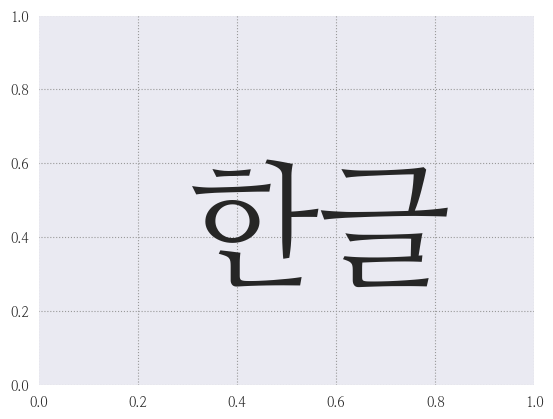

In [51]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name,':', font.fname)
        
    if 'NanumGothic' in font.name:
        fontpath = font.fname
        
font = fm.FontProperties(fname=fontpath, size=9)                 # 폰트 설정
plt.rc('font', family='NanumMyeongjo')                           # 폰트 설정
plt.text(0.3, 0.3, '한글', size=100)                              # 한글 출력되는지 확인



# # 노드에서 작성한 예시
# # 한글이 포함된 시각화를 위해 Matplotlib 설정
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager.findfont(font)
# print("완료!")

Text(0.5, 1.0, '상품별 판매량')

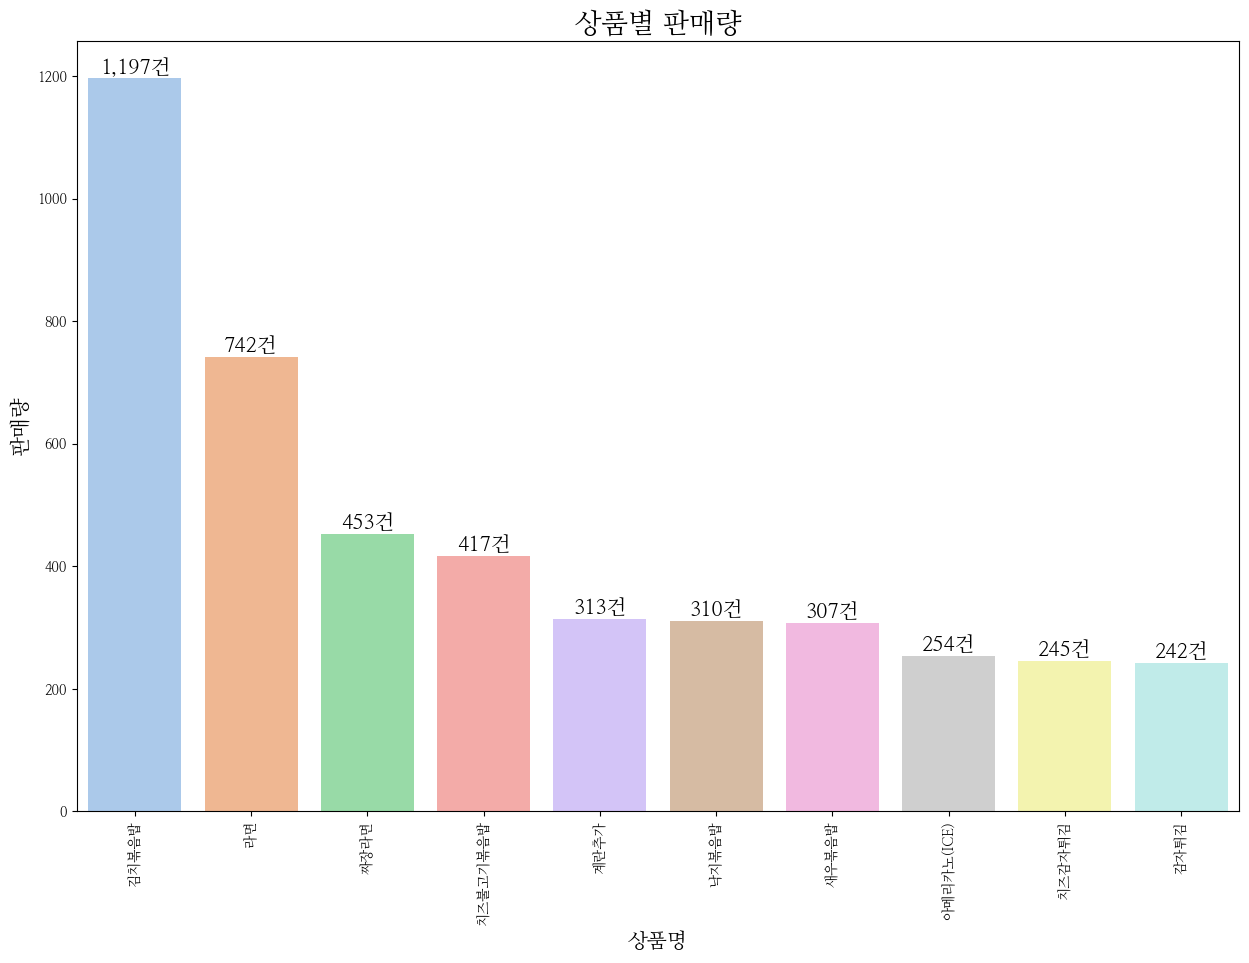

In [21]:
# 집계 결과를 시각화하기

plt.figure(figsize=(15, 10))

ax = sns.barplot(data=items_count, x=items_count.index, y=items_count['판매수량'], palette="pastel")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}건' for x in container.datavalues],  fontsize='15')
plt.xticks(rotation=90)
plt.xlabel('상품명', fontsize='15')
plt.ylabel('판매량', fontsize='15')
plt.title('상품별 판매량',  fontsize='20')

여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

 - 힌트: sort_values() 함수를 사용하세요.


In [22]:
# 한 행의 판매수량이 1개 초과 구매한 내역이 없으므로, 하나의 데이터마다 구매 수량은 1개
# 판매 취소도 -1로 카운트 됐으므로, 모든 구매금액을 더하기만 하면 됨
temp_var[(temp_var['판매수량'] > 1) == True]                           # 확인해보기
temp_var[(temp_var['판매수량'] < -1) == True]                           # 확인해보기

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment


In [23]:
# 상품별 판매금액
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: payment, Length: 100, dtype: int64

In [24]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
새우볶음밥         1529800
치즈감자튀김        1348700
감자튀김          1083800
아메리카노(ICE)     936100
불닭볶음면          688500
Name: payment, dtype: int64

Text(0.5, 1.0, '판매 금액')

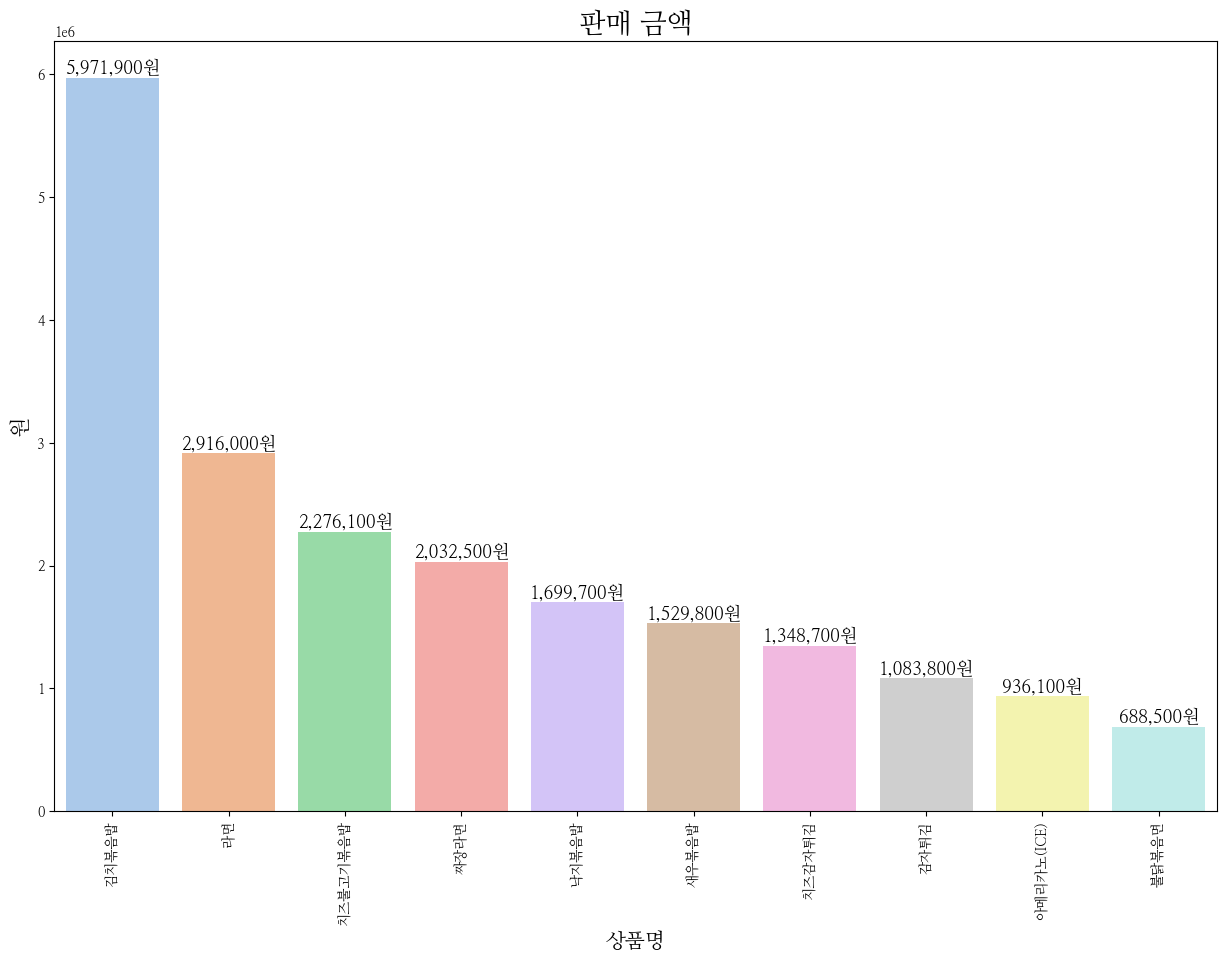

In [25]:
# 집계 결과를 시각화하기

items_payment = pd.DataFrame(items_payment)

plt.figure(figsize=(15, 10))

ax = sns.barplot(data=items_payment[:10], x=items_payment[:10].index, y=items_payment[:10]['payment'], palette="pastel")


container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}원' for x in container.datavalues],  fontsize='13')
plt.xticks(rotation=90)
plt.xlabel('상품명', fontsize='15')
plt.ylabel('원', fontsize='15')
plt.title('판매 금액',  fontsize='20')


# # 노드 예시
# # 집계 결과 시각화하기
# items_payment[:10].plot(kind='bar')
# plt.ylabel('원')
# plt.title('판매 금액')
# plt.show()

### 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.) 

 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

 - 힌트: value_counts() 함수를 사용하세요.


In [26]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [27]:
# temp_var의 금액 타입 확인
temp_var.dtypes

요금제명    object
입실      object
퇴실      object
이용      object
위치      object
금액       int64
구분      object
고객      object
dtype: object

In [28]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)
temp_var['금액'].dtype

dtype('int64')

In [29]:
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [30]:
# 중복데이터 확인
temp_var.duplicated()

0        False
1         True
2        False
3         True
4        False
         ...  
22550    False
22551     True
22552    False
22553     True
22554    False
Length: 22555, dtype: bool

In [31]:
# 중복된 데이터 삭제
temp_var = temp_var.drop_duplicates()
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
7,한국대생 무제한 입장권,2022-04-01 19:32,2022-04-01 22:28,오전 2:56:00,선불기2,6400,퇴실,customer498538
11,한국대생 무제한 입장권,2022-04-01 18:46,2022-04-01 21:38,오전 2:52:00,선불기2,6400,퇴실,customer899296
...,...,...,...,...,...,...,...,...
22548,시간권,2021-02-17 13:11,2021-02-17 13:14,오전 12:02:00,선불기2,0,퇴실,customer715819
22549,종일요금제,2021-02-17 13:10,2021-02-17 14:19,오전 1:09:00,선불기1,6500,퇴실,customer774105
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [32]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1156000
1시간                   52500
1시간 요금제               10000
3시간                   14000
기간권                       0
무제한 입장권             1288900
무제한(일반요금)              6000
무제한(한국대생)              7000
시간 요금제(1시간당)          15000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          1769500
시간요금제(1시간당)           12500
시간요금제(3시간)          1343000
심야-조조무제한            4588000
심야-조조무제한(06시까지)     8795000
이용권                       0
입장권(종일권)           20354500
조조무제한                620000
종일요금제                206500
한국대생 무제한 입장권        4316800
한국대생 입장권(종일권)      63143500
Name: 금액, dtype: int64

In [33]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      63143500
입장권(종일권)           20354500
심야-조조무제한(06시까지)     8795000
심야-조조무제한            4588000
한국대생 무제한 입장권        4316800
시간요금제(1시간)          1769500
시간요금제(3시간)          1343000
무제한 입장권             1288900
18시이후 무제한           1156000
조조무제한                620000
Name: 금액, dtype: int64

Text(0.5, 1.0, '요금제별 총 결제금액')

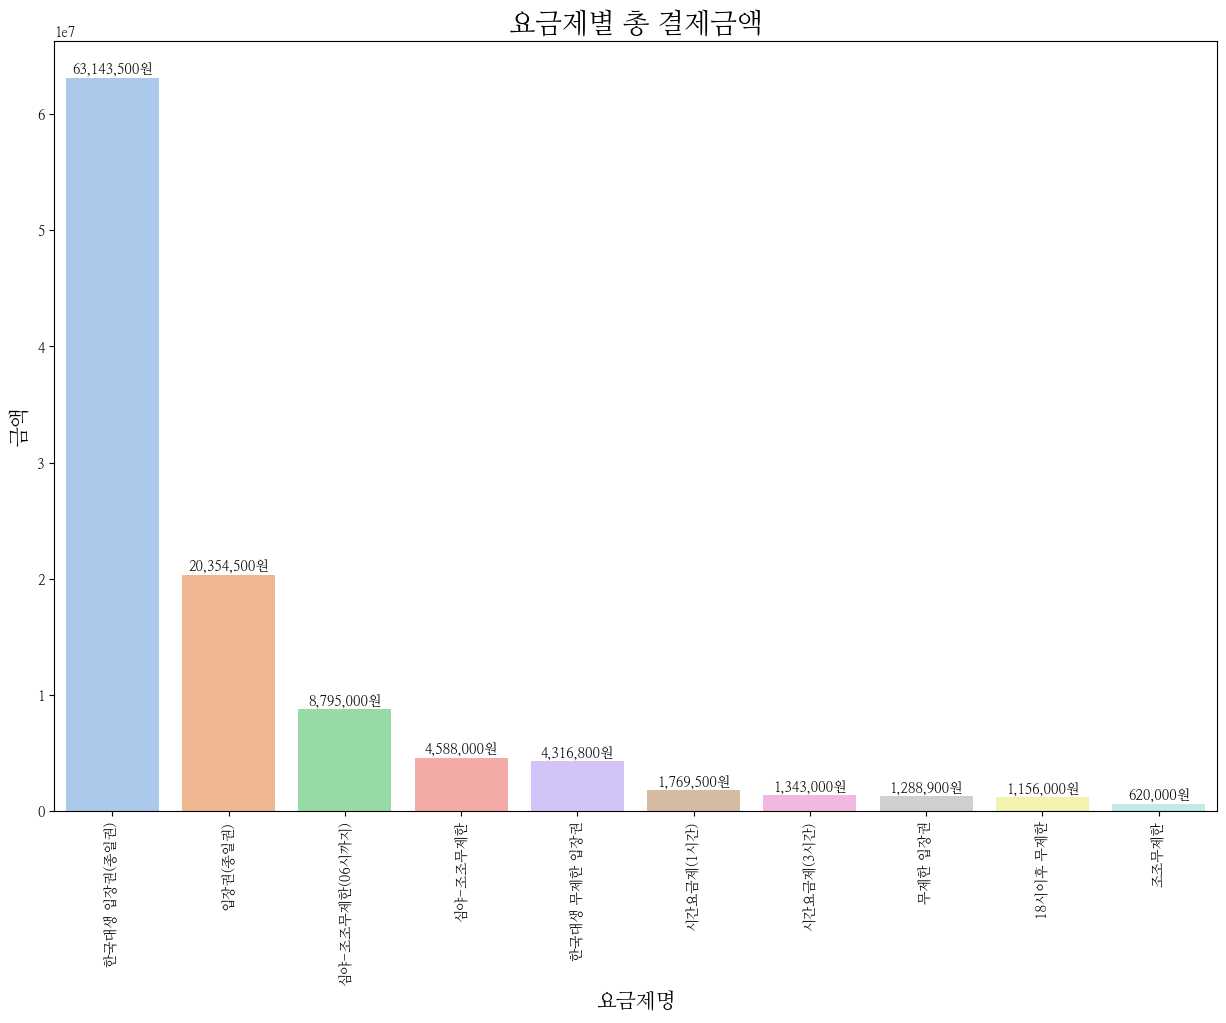

In [34]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15, 10))

tickets_sns = pd.DataFrame(tickets)

ax = sns.barplot(data=tickets_sns[:10], x=tickets_sns[:10].index, y=tickets_sns[:10]['금액'], palette="pastel")
container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}원' for x in container.datavalues],  fontsize='10')
plt.xticks(rotation=90)
plt.xlabel('요금제명', fontsize='15')
plt.ylabel('금액', fontsize='15')
plt.title('요금제별 총 결제금액',  fontsize='20')


# # 노드 예시
# # 집계 결과 시각화하기
# tickets[:10].plot(kind='bar')
# plt.ylabel('원')
# plt.title('입장권별 판매금액')
# plt.show()

# 4. 내가 정의한 문제 해결하기

###  내 Key Question을 중심으로 다양한 분석을 진행해봅시다.

## MECE
__M__utually __E__xclusive __C__ollectively __E__xhaustive
- 상호배타적이면서 누락(빠진)된 것 없이(or 겹쳐지지 않으면서, 부분의 합이 전체가 되도록
- or 서로 중복되지 않고 합쳤을 때 누락되지 않게

## 내가 정의한 문제 해결하기
- 내가 정의한 문제
    - 한국대생이 많은 이용권을 구매하는 것은 단순히 대학교 근처이기 때문이다
    - 일반인도 모두카페를 이용할 요인을 찾는 것이 이번 프로젝트의 목표이다
- 목표
    - 나는 이 프로젝트에서 ( 방학 시즌에 한국대생 외의 손님들을 끌어올 수있는 정보를 찾겠다)을 반드시 해결하겠다   

- 전략 및 수립
    - 월,일,시간에 따른 상품 판매량 확인 및 시각화
    - 이용고객의 이용밀도가 높은 시간 확인 및 시각화



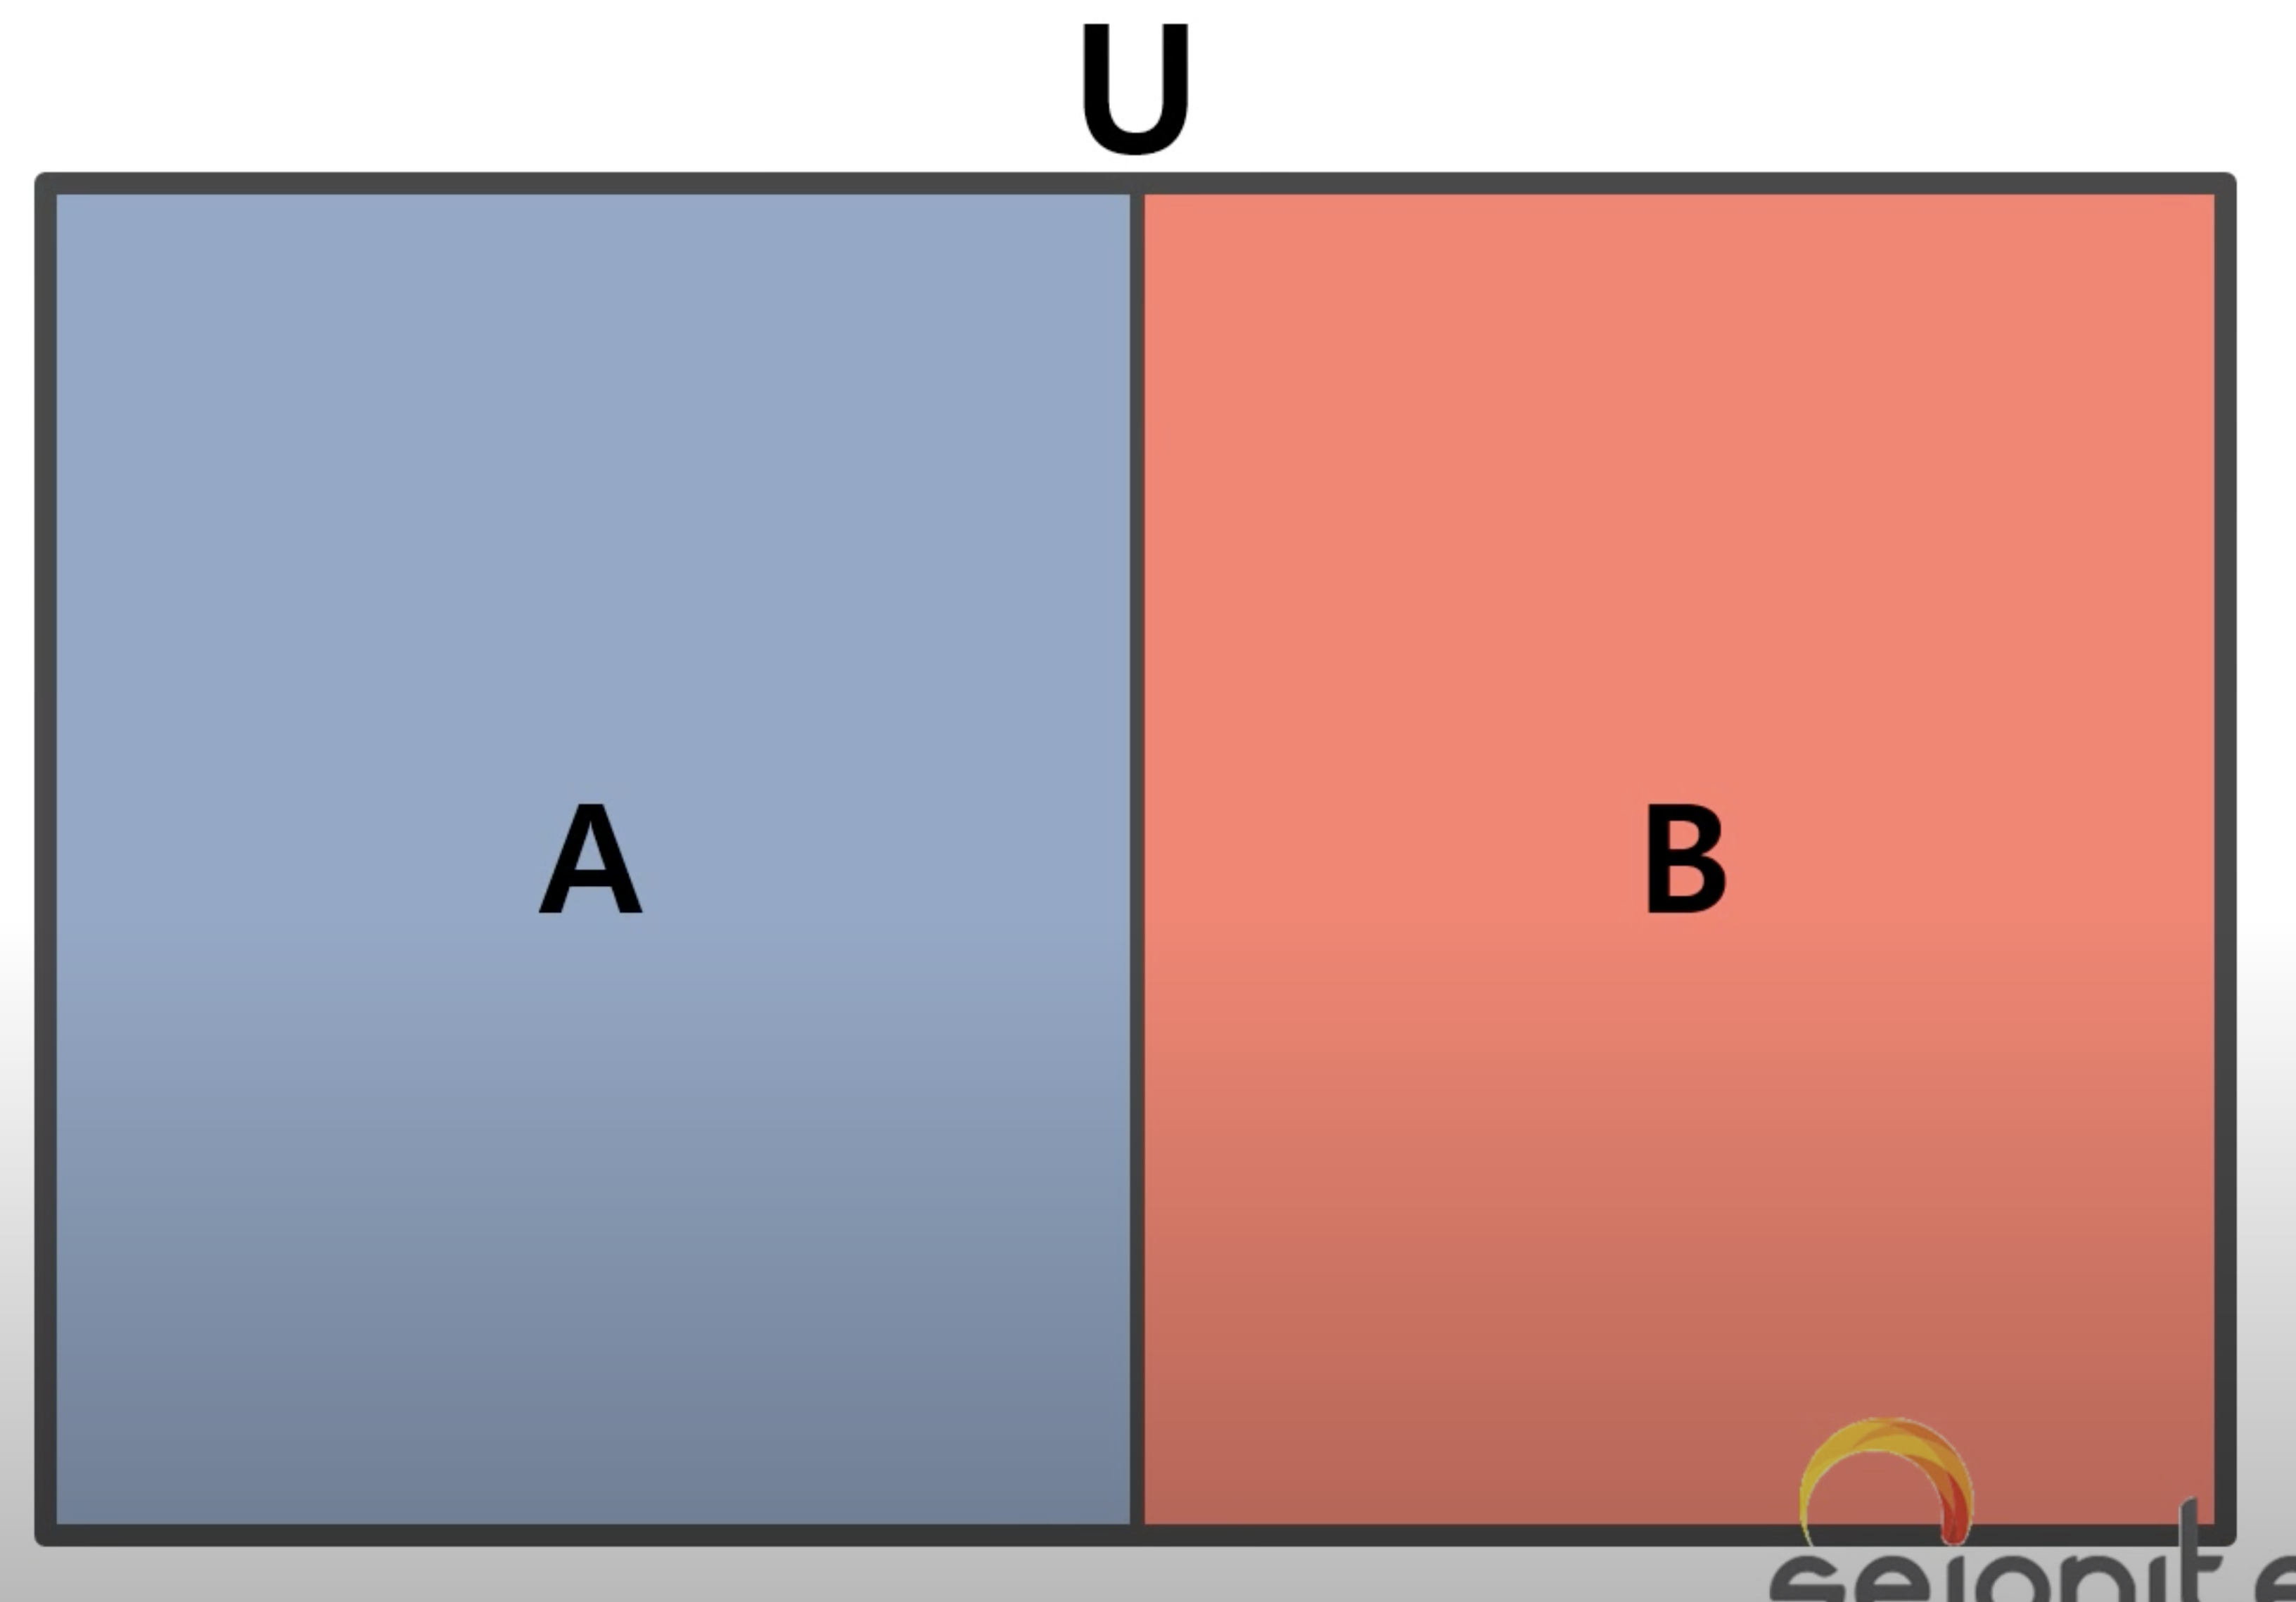

1. 시간대별 이용량 (hue : 이용권)
2. 음식 판매 시간


## 4.1 판매량 추이

### 4.1.1 Sales_data 전처리

In [35]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04,5000


In [36]:
def to_datetime(x):
    x['결제일시'] = pd.to_datetime(x['결제일시'])
    x['Year'] = x['결제일시'].dt.year.astype('int16')
    x['Month'] = x['결제일시'].dt.month.astype('int8')
    x['Day'] = x['결제일시'].dt.day.astype('int8')
    x['Hour'] = x['결제일시'].dt.hour.astype('int8')    
    x['Minute'] = x['결제일시'].dt.minute.astype('int8')
    
    return x

In [37]:
temp_var = to_datetime(temp_var)
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment,Year,Month,Day,Hour,Minute
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04,4500,2022,4,1,19,41
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04,5500,2022,4,1,19,41
2,2022-04-01 19:41:00,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04,4000,2022,4,1,19,41
3,2022-04-01 19:41:00,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04,1000,2022,4,1,19,41
4,2022-04-01 19:41:00,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04,5000,2022,4,1,19,41


## 4.1.2 Sales 시각화

### 4.1.2.1 월별 상품 판매수

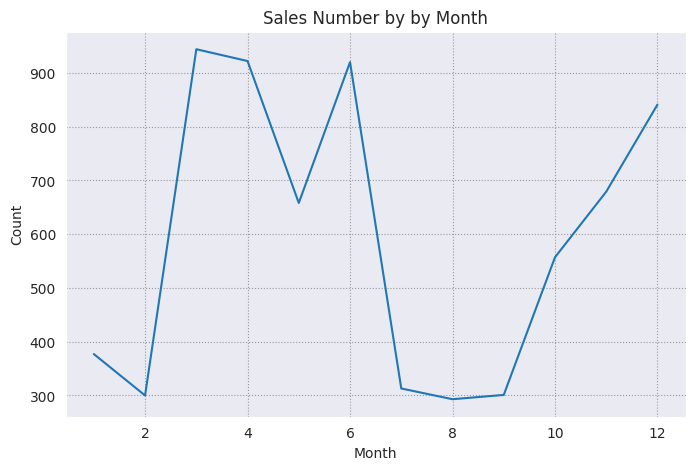

In [38]:
# 도화지
fig = plt.figure(figsize=(8, 5))

temp_var_month = temp_var.groupby('Month')['상품명'].count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
plt.plot(temp_var_month)

# 라벨, 제목, 틱 설정
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sales Number by by Month')
plt.show()

- 2월과 8월에 이용객 감소가 보이는데 이는 한국대생의 방학 시즌의 영향으로 보인다

### 4.1.2.2 일별 상품 판매수

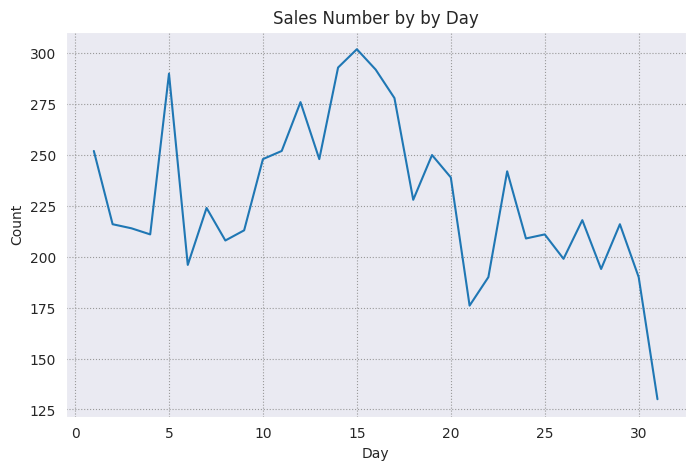

In [39]:
# 도화지
fig = plt.figure(figsize=(8, 5))

temp_var_day = temp_var.groupby('Day')['상품명'].count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
plt.plot(temp_var_day)

# 라벨, 제목, 틱 설정
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sales Number by by Day')
plt.show()

- 31일이 낮은 수를 보이는 이유는 31일이 없는 달이 존재하기 때문에 수가 적은 걸로 추청
- 5일과 15일이 많은 이용객이 있음을 알 수 있음

### 4.1.2.3 시간별 상품 판매수

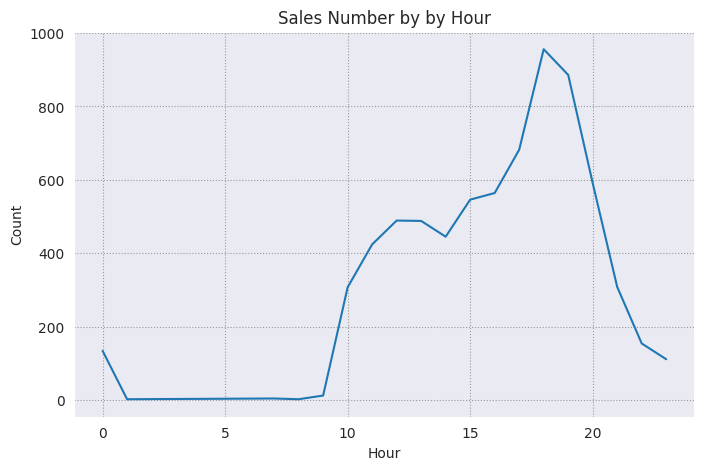

In [40]:
# 도화지
fig = plt.figure(figsize=(8, 5))

temp_var_hour = temp_var.groupby('Hour')['상품명'].count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
plt.plot(temp_var_hour)

# 라벨, 제목, 틱 설정
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Sales Number by by Hour')
plt.show()

- 오전 9시 이후부터 이용객이 증가하기 시작하면서, 18시에 가장 많은 이용객 수가 많다

### 4.1.2.4 년별 상품 판매수

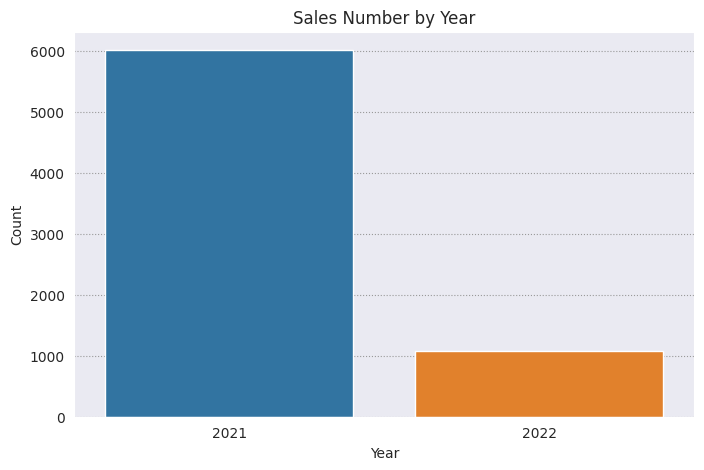

In [41]:
# 도화지
fig = plt.figure(figsize=(8, 5))

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.countplot(x=temp_var['Year'])

# 라벨, 제목, 틱 설정
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sales Number by Year')
plt.show()

In [42]:
# 2022년에는 몇 월까지 있는지 확인
set(temp_var[temp_var['Year'] == 2022]['Month'])

{1, 2, 3, 4}

- 2022년에는 데이터가 4월까지밖에 없어서 2021년보다 이용객수가 현저히 적은 것을 알 수 있다

## 4.2 입장권

In [43]:
# temp_var_entry 변수 설정
temp_var_entry = entry_data

In [44]:
# 중복값 제거 및 인덱스 정렬
temp_var_entry = temp_var_entry.drop_duplicates()
temp_var_entry.reset_index(drop=True, inplace=True)
temp_var_entry

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
2,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
3,한국대생 무제한 입장권,2022-04-01 19:32,2022-04-01 22:28,오전 2:56:00,선불기2,6400,퇴실,customer498538
4,한국대생 무제한 입장권,2022-04-01 18:46,2022-04-01 21:38,오전 2:52:00,선불기2,6400,퇴실,customer899296
...,...,...,...,...,...,...,...,...
19316,시간권,2021-02-17 13:11,2021-02-17 13:14,오전 12:02:00,선불기2,0,퇴실,customer715819
19317,종일요금제,2021-02-17 13:10,2021-02-17 14:19,오전 1:09:00,선불기1,6500,퇴실,customer774105
19318,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
19319,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [45]:
# 한국대생 종일권과 그 외의 이용객에 대한 수
korea = (temp_var_entry['요금제명'] == '한국대생 입장권(종일권)').sum()
non_korea = (temp_var_entry['요금제명'] != '한국대생 입장권(종일권)').sum()

ratio = [korea/(korea+non_korea), non_korea/(korea+non_korea)]

([<matplotlib.patches.Wedge at 0x7fea16283670>,
 [Text(-0.09120314043935077, 1.0962125647765584, '한국대생 무제한 입장권'),
  Text(0.09120314043935088, -1.0962125647765584, 'Other')],
 [Text(-0.049747167512373146, 0.5979341262417591, '53%'),
  Text(0.0497471675123732, -0.5979341262417591, '47%')])

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_

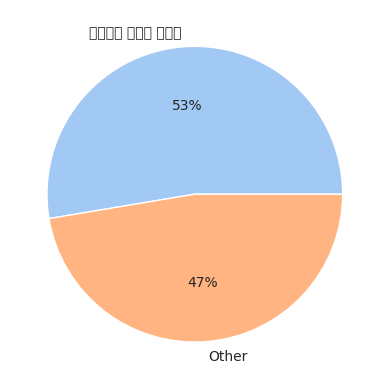

In [46]:
# 파이 그래프로 비중을 확인해보기
colors = sns.color_palette('pastel')[0:5]

plt.pie(ratio, labels=['한국대생 무제한 입장권', 'Other'], colors=colors, autopct='%.0f%%')

- 한국대생이 전체의 53%를 차지하고 있다.
- 너무 많은 비중을 한국대생이 차지하므로 사업의 리스크를 줄이기 위해서라도 일반인 고객을 유치시키는 것이 필요해보인다

# 결론

판매량이 2월과 8월에 매출이 상대적으로 적고 18시 즈음에 가장 많은 판매량을 보이고 있다.   
또한 한국대생이 전체 53%를 차지하고 있는 데이터를 확인할 수 있었다
따라서 2월과 8월 오후 15시부터 20시까지 이벤트를 열어서 한국대생이 아닌 일반 사람들에게도 모두카페를 이용하도록 유도하는 것이 좋겠다

# 회고


In [ ]:
1. 이번 프로젝트에서 어려웠던 점 
    - MECE를 통해 문제를 정의하고 목표를 설정하는 것이 어려웠다
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    - 한글이 지원이 안되어 별도로 폰트를 임포트해줘야 한다는 점을 알게 되었다

3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
    - 다양한 시간별로 그래프를 그려 시각화하였다
    - 목표설정과 그에 대한 결론을 내렸다
    
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함

    
5. 자기 다짐
     - 그래프 그리는 것이 익숙치가 않았다. 앞으로 그래프 그릴 때 다양한 자료를 참고하여 익히도록 해야겠다

    

